In [1]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    if val_end < val_start:
        val_end = val_start + d[val_start:].find(")")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    #port = None
    
    for d in data:
        if "data_kind" in d:
            #d = d.replace("\n", "")
            #d = d.replace(" ", "")
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            nq = int(extract_val(d, "num_queries"))
            wk = extract_val(d, "workload")
            if "port" not in d:
                break
            
            port = int(extract_val(d, "port"))
            skip_likes = int(extract_val(d, "skip_likes"))
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-5])
            qerr = float(linedata[-3].replace("QErr:", ""))
            
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
            retdata["num_queries"].append(nq)
            retdata["workload"].append(wk)
            retdata["port"].append(port)
            retdata["skip_likes"].append(skip_likes)
            retdata["qerr"].append(qerr)
            
    df = pd.DataFrame(retdata)
    return df

In [3]:
LOGDIR = "../results/"

In [4]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

In [5]:
df = pd.concat(dfs)

In [6]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'gen_shuffle', 'true_cols'} {'n'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload,port,skip_likes,qerr
0,1412706111350165054529954383171903240337882399016,0.147469,0,true_cols,n,100,ceb,5432,1,1.000000
1,845697540102295928657811596227970506096002273384,0.370827,0,true_cols,n,100,ceb,5432,1,2.545024
2,428479027960649776600128440654385951132899596406,0.136369,0,true_cols,n,100,ceb,5432,1,1.842938
3,84075949613328714275869842821526357397337767243,0.129222,0,true_cols,n,100,ceb,5432,1,1.000000
4,1331203710710213837019143823676324531895931998752,0.235932,0,true_cols,n,100,ceb,5432,1,1.760590
...,...,...,...,...,...,...,...,...,...,...
95,1365560511827540280410164524466910427556846942739,0.177746,0,gen_shuffle,n,100,ceb,5432,1,1.001886
96,701628067153492460713013175352603531273729755347,0.147197,0,gen_shuffle,n,100,ceb,5432,1,1.844995
97,1033264563403587386810187324568561056824409829246,0.144496,0,gen_shuffle,n,100,ceb,5432,1,2.533271
98,808272285368736912048750959935922478186420134682,0.145873,0,gen_shuffle,n,100,ceb,5432,1,1.001116


In [21]:
df.head(20)

,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload,port,skip_likes,qerr
0,1074935413463925970481473747615913514666708266616,2.292551,0,gen_shuffle2,trans,100,financial,5432,1,1.002626
1,274722965381506554849615708008028753256089600685,0.699948,0,gen_shuffle2,trans,100,financial,5432,1,1.013103
2,513396396127591437221704709524941599726437369660,0.562723,0,gen_shuffle2,trans,100,financial,5432,1,1.001263
3,744238326054165838069486068905163224640633120308,0.818771,0,gen_shuffle2,trans,100,financial,5432,1,1.017678
4,1300838602943136949971937263485443846788580778131,0.442093,0,gen_shuffle2,trans,100,financial,5432,1,1.019959
5,1393407074149083411911179344395731655945561253846,0.495203,0,gen_shuffle2,trans,100,financial,5432,1,1.003150
6,580467853132580046877035659978890299531066820722,0.709744,0,gen_shuffle2,trans,100,financial,5432,1,1.014492
7,315195932775779763118778235889804918914663376907,0.384127,0,gen_shuffle2,trans,100,financial,5432,1,1.030233
8,1350808533127689843775828351339919530802788190738,0.690427,0,gen_shuffle2,trans,100,financial,5432,1,1.823106
9,379773043104765328888016256552475863260517636694,0.556127,0,gen_shuffle2,trans,100,financial,5432,1,1.003367


In [22]:
# tmp = df[df.data_kind == "gen_shuffle"]
# tmp

In [23]:
print(df.keys())
print(set(df["inp_to_eval"]))

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries',
       'workload', 'port', 'skip_likes', 'qerr'],
      dtype='object')
{'n', 'mi', 'trans'}


In [24]:
#df = df[df.data_kind != 'random_domain']
#df = df[df.data_kind != 'random_domain']

INP = "mi"
NUMQ = -1

# INP = "n"
# NUMQ = -1

#df = df[df.data_kind != 'test']
#df = df[df.data_kind != 'test_shuffle']
df = df[df.inp_to_eval == INP]
df = df[df.num_queries == NUMQ]
df = df[df["skip_likes"] == 1]
df = df[df.port == 5432]

In [25]:
df.keys()

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries',
       'workload', 'port', 'skip_likes', 'qerr'],
      dtype='object')

In [26]:
print(set(df["data_kind"]))
df.head(5)

{'test_shuffle', 'test_shuffle2', 'true_cols'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,workload,port,skip_likes,qerr
0,1445181067565615963714989244604800786123047056644,0.913630,0,test_shuffle2,mi,-1,ceb,5432,1,1.030332
1,915029170915645337045155848430817461122198949223,0.761092,0,test_shuffle2,mi,-1,ceb,5432,1,1.073923
2,648840168530145489155498068332217171541974777094,0.386919,0,test_shuffle2,mi,-1,ceb,5432,1,1.218865
3,939906722582594503280211484844109823221417696432,0.648328,0,test_shuffle2,mi,-1,ceb,5432,1,1.023634
4,985595977828115300791443894398287667156903744520,1.147004,0,test_shuffle2,mi,-1,ceb,5432,1,1.110890


In [27]:
print(set(df["num_queries"]))
print(set(df["data_kind"]))

{-1}
{'test_shuffle', 'test_shuffle2', 'true_cols'}


In [28]:
mapping = {}
mapping["true_cols"] = "True Data"

mapping["test_shuffle"] = "Generated Data"
mapping["test_shuffle2"] = "Generated Data 2"
mapping["random_domain"] = "Uniform Domain Data"

mapping["gen_shuffle2"] = "Generated Data 2"
mapping["gen_shuffle1"] = "Generated Data"
mapping["gen_shuffle"] = "Generated Data"
mapping["unfilled_gen_shuffle"] = "Our Gen Data 3"
df["data_kind"] = df.apply(lambda x: mapping[x["data_kind"]] , axis=1)

In [29]:
tmp = df[df["data_kind"] == "True Data"]
tmp = tmp.groupby("ehash")["qerr"].mean().reset_index()
qerr_base = pd.Series(tmp.qerr.values,index=tmp.ehash).to_dict()

In [30]:
df["qerr"] = df.apply(lambda x: max(x["qerr"] / qerr_base[x["ehash"]], (qerr_base[x["ehash"]] / x["qerr"])) ,axis=1)

In [31]:
df.groupby(["data_kind"])["qerr"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
Generated Data,3725.0,747.322056,3849.571275,1.0,1.047616,2.624503,22558.84,49484.0
Generated Data 2,3725.0,683.462271,3661.182026,1.0,1.047477,2.577120,21630.76,49484.0
True Data,3725.0,1.000000,0.000000,1.0,1.000000,1.000000,1.00,1.0


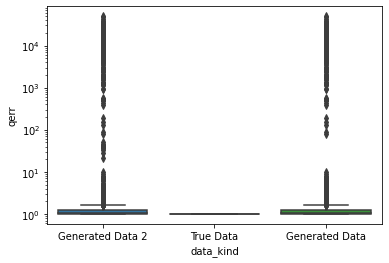

In [32]:
sns.boxplot(data=df, x="data_kind", y = "qerr")
plt.yscale("log")

In [33]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
Generated Data      2158.126836
Generated Data 2    2986.102928
True Data           3102.173084
Name: rt, dtype: float64

In [34]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
Generated Data,3725.0,0.579363,0.135825,0.353181,0.571868,0.765238,0.926627,1.048375
Generated Data 2,3725.0,0.801638,0.279570,0.375174,0.800591,1.181446,1.514550,1.741896
True Data,3725.0,0.832798,0.275917,0.418342,0.831192,1.214449,1.543606,1.762746


In [35]:
tmp = df.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()

In [36]:
edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()

In [37]:
edf.corr()

data_kind,Generated Data,Generated Data 2,True Data
data_kind,,,
Generated Data,1.000000,0.997325,0.996530
Generated Data 2,0.997325,1.000000,0.999443
True Data,0.996530,0.999443,1.000000


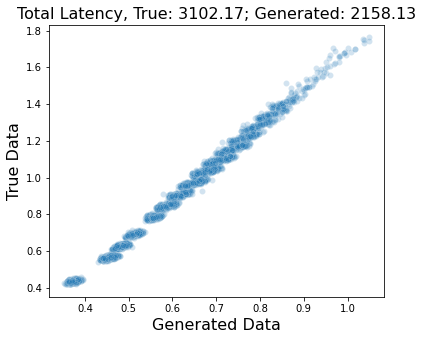

In [38]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,5))
true_rt = round(df.groupby(["data_kind"])["rt"].sum()["True Data"], 2)
gen_rt = round(df.groupby(["data_kind"])["rt"].sum()["Generated Data"], 2)

title = "Total Latency, True: {}; Generated: {}".format(true_rt, gen_rt)

sns.scatterplot(data=edf, x = "Generated Data", y="True Data", alpha=0.2, ax=ax)

ax.set_ylabel("True Data", fontsize=16)
ax.set_xlabel("Generated Data", fontsize=16)

plt.title(title, fontsize=16)

FN= "{}-{}-scatterplot.pdf".format(INP,NUMQ)
plt.savefig(FN, bbox_inches="tight")
plt.show()

mi--1-scatterplot.pdf


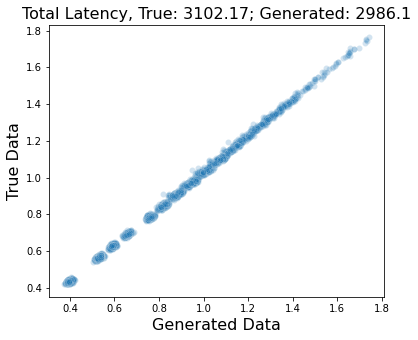

In [43]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,5))
true_rt = round(df.groupby(["data_kind"])["rt"].sum()["True Data"], 2)
gen_rt = round(df.groupby(["data_kind"])["rt"].sum()["Generated Data 2"], 2)

title = "Total Latency, True: {}; Generated: {}".format(true_rt, gen_rt)

sns.scatterplot(data=edf, x = "Generated Data 2", y="True Data", alpha=0.2, ax=ax)

ax.set_ylabel("True Data", fontsize=16)
ax.set_xlabel("Generated Data", fontsize=16)

plt.title(title, fontsize=16)

FN= "{}-{}-scatterplot.pdf".format(INP,NUMQ)
print(FN)
plt.savefig(FN, bbox_inches="tight")
plt.show()

In [40]:
true_rt = round(df.groupby(["data_kind"])["rt"].sum()["True Data"], 2)
gen_rt = round(df.groupby(["data_kind"])["rt"].sum()["Uniform Domain Data"], 2)

title = "Total Latency, True: {}; Generated data: {}".format(true_rt, gen_rt)

sns.scatterplot(data=edf, x = "Uniform Domain Data", y="True Data", alpha=0.2)

plt.title(title)
plt.show()

KeyError: 'Uniform Domain Data'